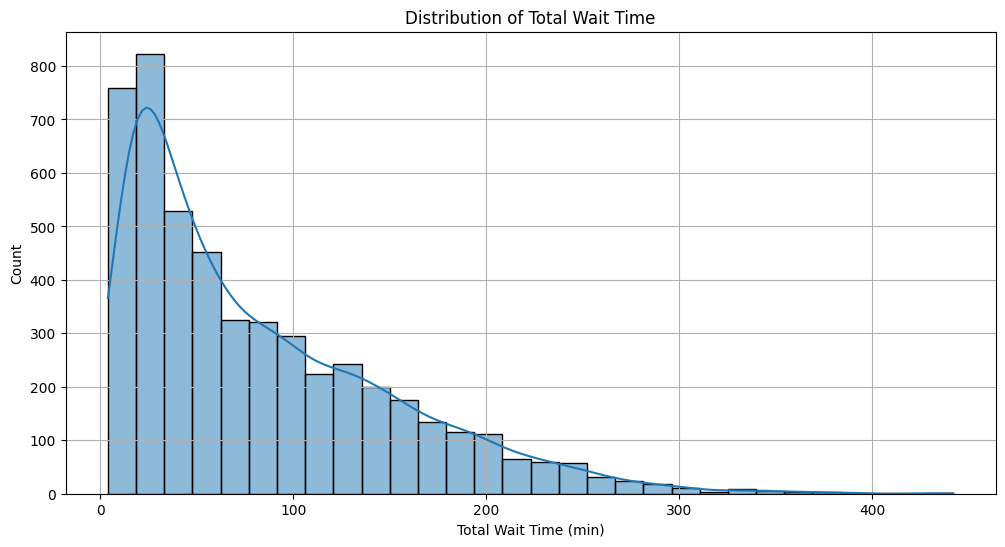

<ipython-input-2-3866229553>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')


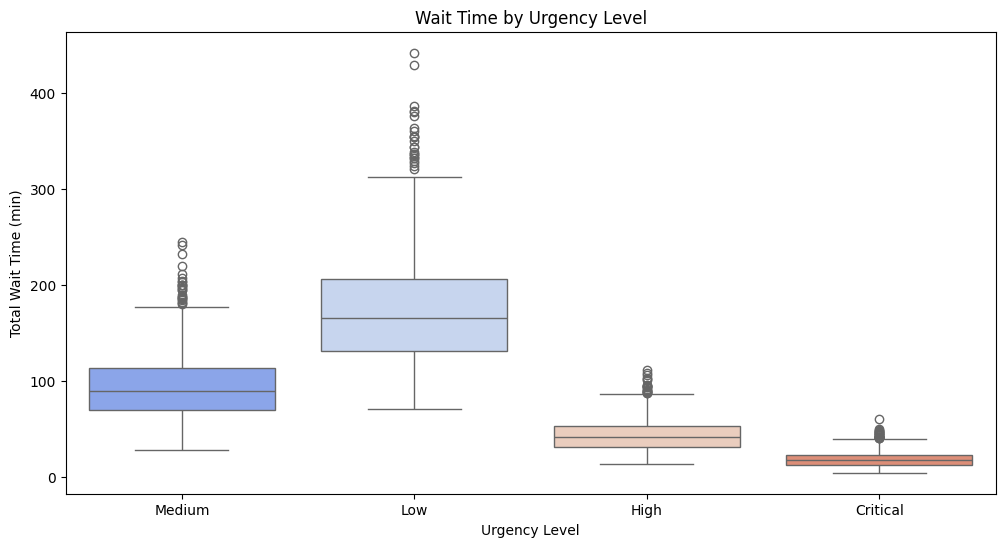

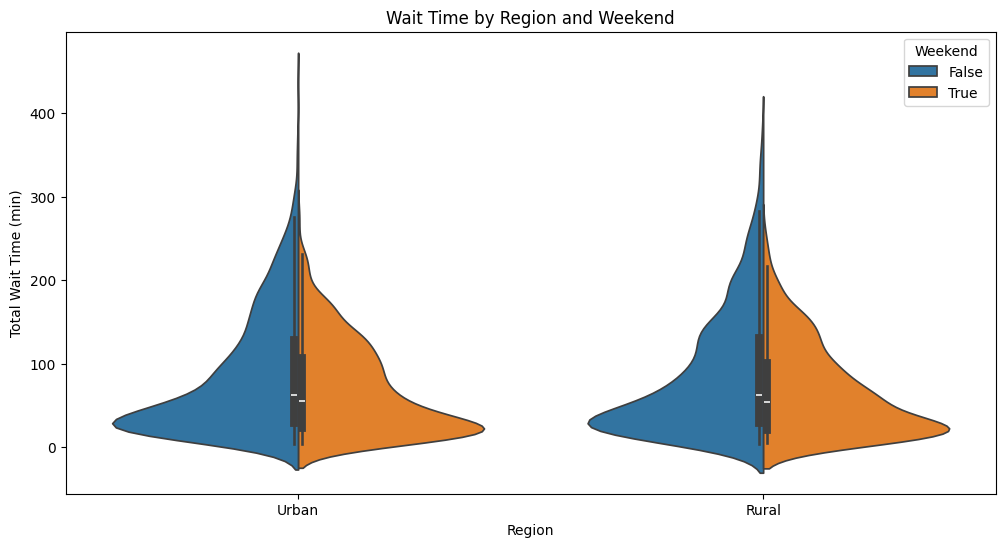

(5000, 28)

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/ER Wait Time Dataset.csv")
# Make a fresh copy
df_fe = df.copy()

# --- Feature Engineering ---

# Convert date
df_fe['Visit Date'] = pd.to_datetime(df_fe['Visit Date'])
df_fe['Visit Hour'] = df_fe['Visit Date'].dt.hour
df_fe['Visit Month'] = df_fe['Visit Date'].dt.month
df_fe['Weekend'] = df_fe['Day of Week'].isin(['Saturday', 'Sunday'])

# Interaction features
df_fe['Beds per Specialist'] = df_fe['Facility Size (Beds)'] / (df_fe['Specialist Availability'] + 1e-5)
df_fe['Patients per Nurse'] = df_fe['Nurse-to-Patient Ratio']

# Drop ID-like columns
df_fe.drop(columns=['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Visit Date'], inplace=True)

# --- Visualizations ---

plt.figure(figsize=(12, 6))
sns.histplot(df_fe['Total Wait Time (min)'], kde=True, bins=30)
plt.title('Distribution of Total Wait Time')
plt.xlabel('Total Wait Time (min)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')
plt.title('Wait Time by Urgency Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_fe, x='Region', y='Total Wait Time (min)', hue='Weekend', split=True)
plt.title('Wait Time by Region and Weekend')
plt.show()

# --- Preprocessing Pipeline ---

numerical_cols = [
    'Nurse-to-Patient Ratio', 'Specialist Availability', 'Facility Size (Beds)',
    'Time to Registration (min)', 'Time to Triage (min)', 'Time to Medical Professional (min)',
    'Visit Hour', 'Visit Month', 'Beds per Specialist', 'Patients per Nurse'
]

categorical_cols = [
    'Region', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level', 'Weekend'
]

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))  # <-- Fixed here
    ]), categorical_cols)
])

# Define X and y
X = df_fe.drop(columns=['Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'])
y = df_fe['Total Wait Time (min)']

# Fit-transform
X_transformed = preprocessor.fit_transform(X)

# Shape of final dataset
X_transformed.shape


In [3]:
# Convert transformed array to DataFrame
df_final = pd.DataFrame(X_transformed, columns=final_feature_names)

# Add target column back
df_final['Total Wait Time (min)'] = y.values

# Save to CSV
df_final.to_csv("Preprocessed_ER_WaitTime_Data.csv", index=False)


NameError: name 'final_feature_names' is not defined

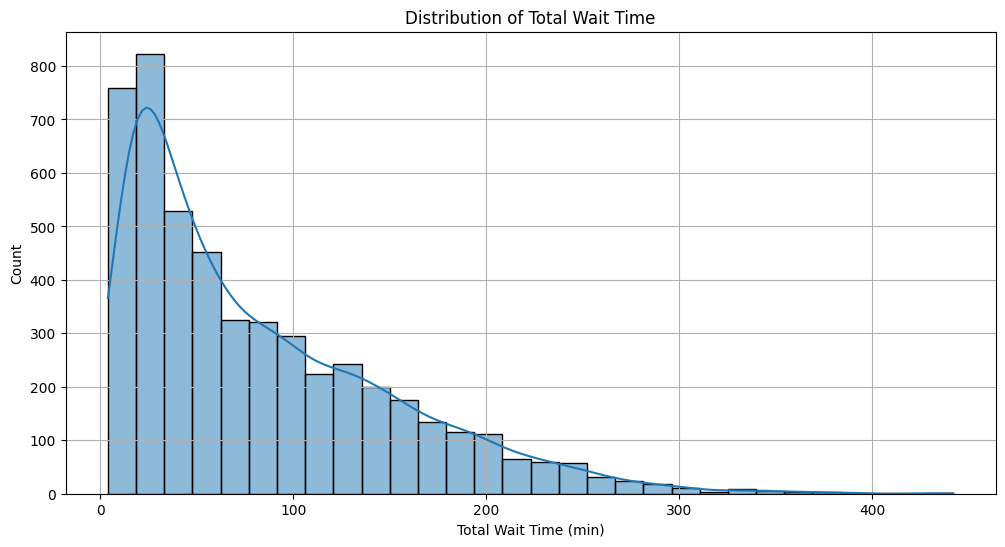

<ipython-input-4-1035634412>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')


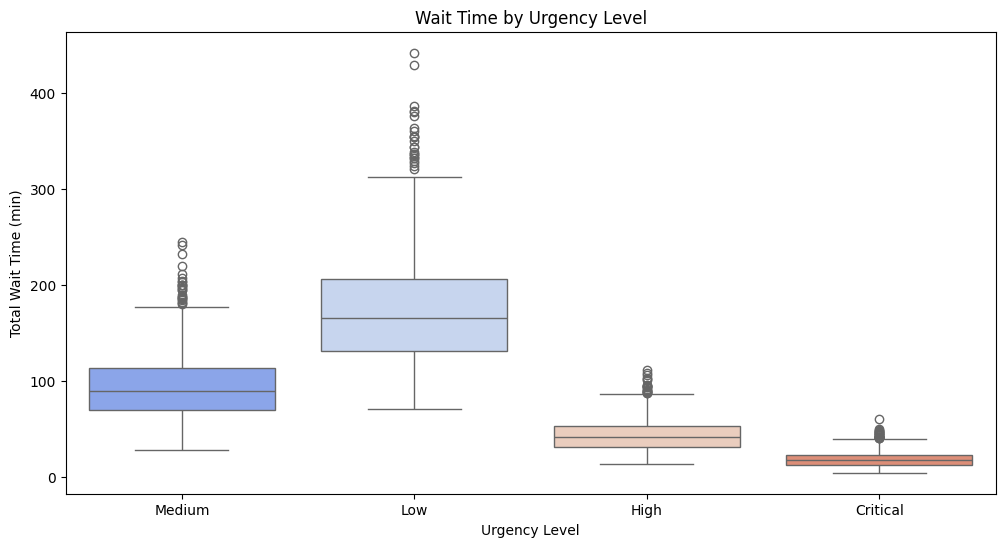

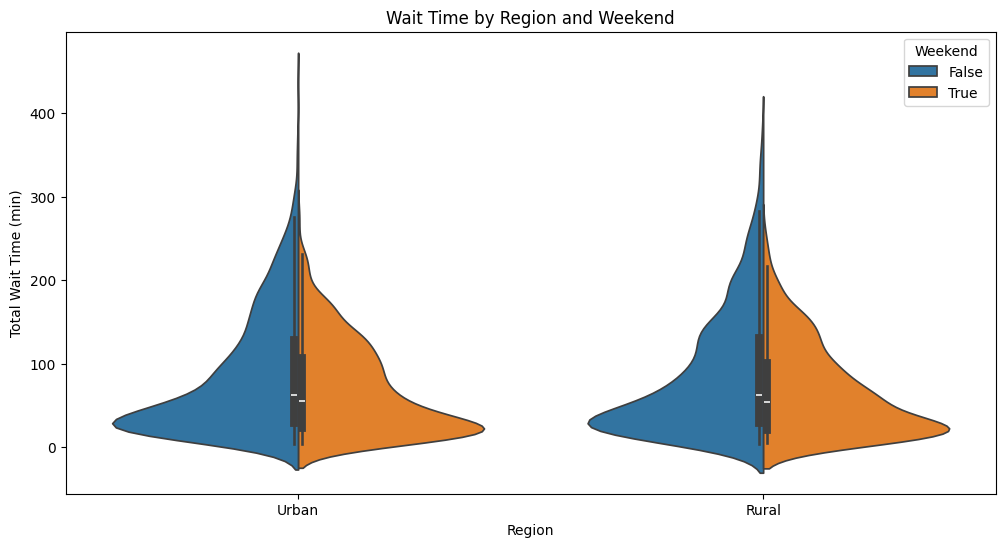

Dataset saved as 'Preprocessed_ER_WaitTime_Data.csv'


In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/ER Wait Time Dataset.csv")

# Make a fresh copy
df_fe = df.copy()

# --- Feature Engineering ---

# Convert date
df_fe['Visit Date'] = pd.to_datetime(df_fe['Visit Date'])
df_fe['Visit Hour'] = df_fe['Visit Date'].dt.hour
df_fe['Visit Month'] = df_fe['Visit Date'].dt.month
df_fe['Weekend'] = df_fe['Day of Week'].isin(['Saturday', 'Sunday'])

# Interaction features
df_fe['Beds per Specialist'] = df_fe['Facility Size (Beds)'] / (df_fe['Specialist Availability'] + 1e-5)
df_fe['Patients per Nurse'] = df_fe['Nurse-to-Patient Ratio']

# Drop ID-like columns
df_fe.drop(columns=['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Visit Date'], inplace=True)

# --- Visualizations ---

plt.figure(figsize=(12, 6))
sns.histplot(df_fe['Total Wait Time (min)'], kde=True, bins=30)
plt.title('Distribution of Total Wait Time')
plt.xlabel('Total Wait Time (min)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')
plt.title('Wait Time by Urgency Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_fe, x='Region', y='Total Wait Time (min)', hue='Weekend', split=True)
plt.title('Wait Time by Region and Weekend')
plt.show()

# --- Preprocessing Pipeline ---

numerical_cols = [
    'Nurse-to-Patient Ratio', 'Specialist Availability', 'Facility Size (Beds)',
    'Time to Registration (min)', 'Time to Triage (min)', 'Time to Medical Professional (min)',
    'Visit Hour', 'Visit Month', 'Beds per Specialist', 'Patients per Nurse'
]

categorical_cols = [
    'Region', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level', 'Weekend'
]

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))  # for older scikit-learn versions
    ]), categorical_cols)
])

# Define X and y
X = df_fe.drop(columns=['Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'])
y = df_fe['Total Wait Time (min)']

# Fit-transform the pipeline
X_transformed = preprocessor.fit_transform(X)

# --- Get feature names for transformed data ---
# Get names from OneHotEncoder
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine numerical and encoded categorical feature names
final_feature_names = numerical_cols + list(ohe_feature_names)

# Convert transformed data to DataFrame
df_final = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
                        columns=final_feature_names)

# Add target column
df_final['Total Wait Time (min)'] = y.values

# Save to CSV
df_final.to_csv("/content/drive/MyDrive/Optimizing healthcare datasets/Preprocessed_ER_WaitTime_Data.csv", index=False)

print("Dataset saved as 'Preprocessed_ER_WaitTime_Data.csv'")


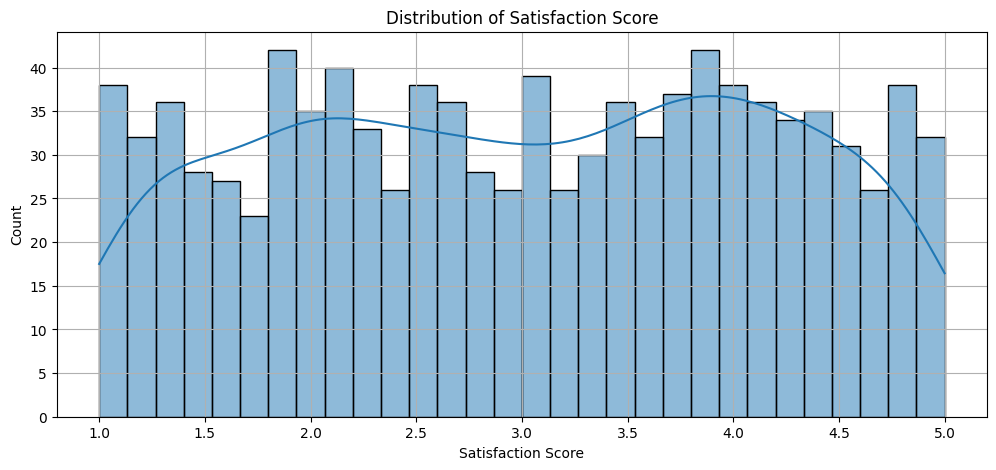

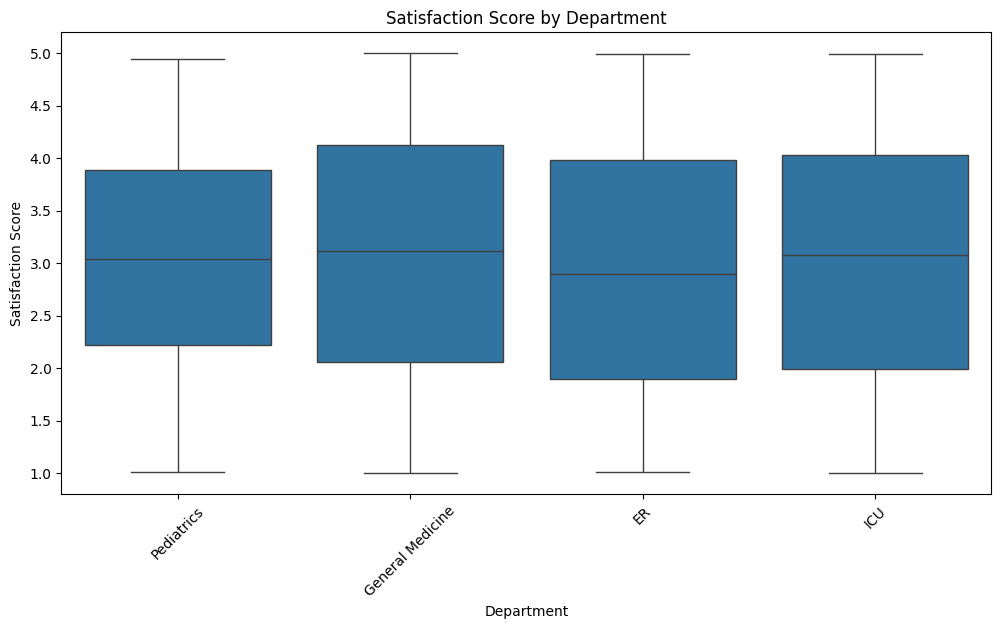

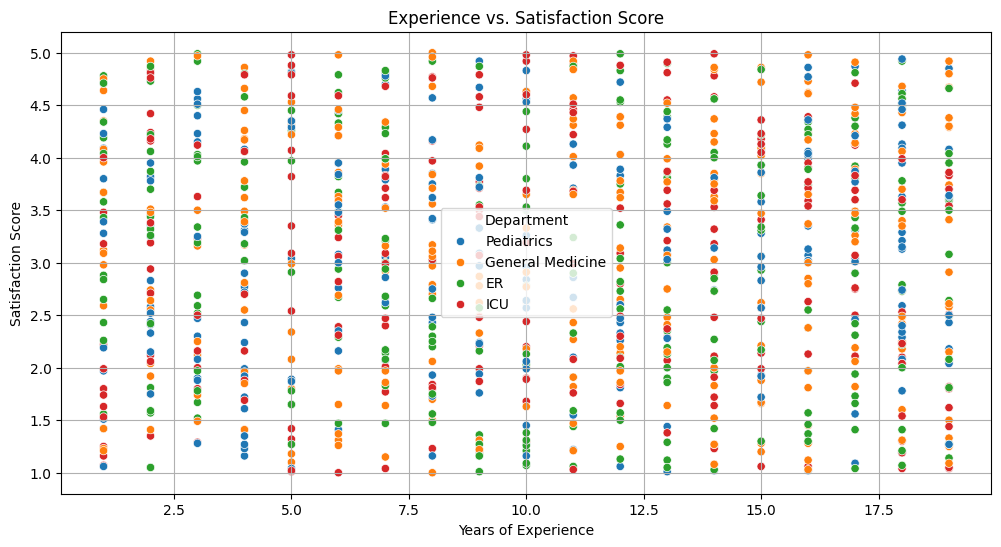

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df_staff = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/staff_scheduling_dataset.csv")

# Make a copy
df_fe_staff = df_staff.copy()

# --- Feature Engineering ---

# Drop ID column
df_fe_staff.drop(columns=['Staff ID'], inplace=True)

# Overtime ratio
df_fe_staff['Overtime Ratio'] = df_fe_staff['Overtime Hours'] / (df_fe_staff['Shift Duration (Hours)'] + 1e-5)

# Experience level categorization
df_fe_staff['Experience Level'] = pd.cut(df_fe_staff['Years of Experience'],
                                         bins=[0, 5, 10, 20, np.inf],
                                         labels=['Novice', 'Intermediate', 'Experienced', 'Veteran'])

# Satisfaction change from last review
df_fe_staff['Satisfaction Change'] = (
    df_fe_staff['Satisfaction Score'] - df_fe_staff['Previous Satisfaction Rating']
)

# --- Visualizations ---

plt.figure(figsize=(12, 5))
sns.histplot(df_fe_staff['Satisfaction Score'], kde=True, bins=30)
plt.title('Distribution of Satisfaction Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fe_staff, x='Department', y='Satisfaction Score')
plt.title('Satisfaction Score by Department')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_fe_staff, x='Years of Experience', y='Satisfaction Score', hue='Department')
plt.title('Experience vs. Satisfaction Score')
plt.grid(True)
plt.show()

# --- Preprocessing Pipeline ---

numerical_cols = [
    'Shift Duration (Hours)', 'Patient Load', 'Workdays per Month', 'Satisfaction Score',
    'Overtime Hours', 'Years of Experience', 'Previous Satisfaction Rating',
    'Absenteeism (Days)', 'Overtime Ratio', 'Satisfaction Change'
]

categorical_cols = ['Department', 'Experience Level']

preprocessor_staff = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))
    ]), categorical_cols)
])

# Define feature set
X_staff = df_fe_staff.copy()

# Fit and transform the data
X_staff_transformed = preprocessor_staff.fit_transform(X_staff)

# Get final feature names
num_features = numerical_cols
cat_features = preprocessor_staff.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
final_feature_names_staff = list(num_features) + list(cat_features)

# Convert to DataFrame
df_staff_final = pd.DataFrame(X_staff_transformed, columns=final_feature_names_staff)

# Save to CSV
df_staff_final.to_csv("/content/drive/MyDrive/Optimizing healthcare datasets/Preprocessed_Staff_Scheduling_Data.csv", index=False)
